In [ ]:
#data wrangling
import pandas as pd
import numpy as np
#datetime
import datetime as dt


In [ ]:
# load sheet Transactions trong file KPMG và in ra 5 dòng đầu tiên
import pandas as pd
import datetime as dt
ta = pd.read_excel('KPMG.xlsx', sheet_name = "Transactions")
print(ta.head(5))

   transaction_id  product_id  customer_id transaction_date  online_order  \
0               1           2         2950       2017-02-25           0.0   
1               2           3         3120       2017-05-21           1.0   
2               3          37          402       2017-10-16           0.0   
3               4          88         3135       2017-08-31           0.0   
4               5          78          787       2017-10-01           1.0   

  order_status           brand product_line product_class product_size  \
0     Approved           Solex     Standard        medium       medium   
1     Approved   Trek Bicycles     Standard        medium        large   
2     Approved      OHM Cycles     Standard           low       medium   
3     Approved  Norco Bicycles     Standard        medium       medium   
4     Approved  Giant Bicycles     Standard        medium        large   

   list_price  standard_cost  product_first_sold_date  
0       71.49          53.62        

In [ ]:
# in ra info bảng
print(ta)

       transaction_id  product_id  customer_id transaction_date  online_order  \
0                   1           2         2950       2017-02-25           0.0   
1                   2           3         3120       2017-05-21           1.0   
2                   3          37          402       2017-10-16           0.0   
3                   4          88         3135       2017-08-31           0.0   
4                   5          78          787       2017-10-01           1.0   
...               ...         ...          ...              ...           ...   
19995           19996          51         1018       2017-06-24           1.0   
19996           19997          41          127       2017-11-09           1.0   
19997           19998          87         2284       2017-04-14           1.0   
19998           19999           6         2764       2017-07-03           0.0   
19999           20000          11         1144       2017-09-22           1.0   

      order_status         

In [ ]:
# describe default
print(ta.describe())

       transaction_id   product_id   customer_id  online_order    list_price  \
count    20000.000000  20000.00000  20000.000000  19640.000000  20000.000000   
mean     10000.500000     45.36465   1738.246050      0.500458   1107.829449   
std       5773.647028     30.75359   1011.951046      0.500013    582.825242   
min          1.000000      0.00000      1.000000      0.000000     12.010000   
25%       5000.750000     18.00000    857.750000      0.000000    575.270000   
50%      10000.500000     44.00000   1736.000000      1.000000   1163.890000   
75%      15000.250000     72.00000   2613.000000      1.000000   1635.300000   
max      20000.000000    100.00000   5034.000000      1.000000   2091.470000   

       standard_cost  product_first_sold_date  
count   19803.000000             19803.000000  
mean      556.046951             38199.776549  
std       405.955660              2875.201110  
min         7.210000             33259.000000  
25%       215.140000             35667.

In [ ]:
# describe các biến object
ta.describe(include=np.object)

<ipython-input-54-edd163be3489>:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ta.describe(include=np.object)


,order_status,brand,product_line,product_class,product_size
count,20000,19803,19803,19803,19803
unique,2,6,4,3,3
top,Approved,Solex,Standard,medium,medium
freq,19821,4253,14176,13826,12990


In [ ]:
# describe all
print(ta.describe(include='all'))


        transaction_id   product_id   customer_id     transaction_date  \
count     20000.000000  20000.00000  20000.000000                20000   
unique             NaN          NaN           NaN                  364   
top                NaN          NaN           NaN  2017-02-14 00:00:00   
freq               NaN          NaN           NaN                   82   
first              NaN          NaN           NaN  2017-01-01 00:00:00   
last               NaN          NaN           NaN  2017-12-30 00:00:00   
mean      10000.500000     45.36465   1738.246050                  NaN   
std        5773.647028     30.75359   1011.951046                  NaN   
min           1.000000      0.00000      1.000000                  NaN   
25%        5000.750000     18.00000    857.750000                  NaN   
50%       10000.500000     44.00000   1736.000000                  NaN   
75%       15000.250000     72.00000   2613.000000                  NaN   
max       20000.000000    100.00000   

<ipython-input-55-b7c0f07fcf4a>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(ta.describe(include='all'))


In [ ]:
# count số dòng bị null ở mỗi cột
count_null = ta.isnull().sum(axis=0)
print(count_null)

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64


# 1. Data Correction

## 1.1 Drop NA

In [ ]:
# tạo bảng df_dropna_all bằng cách loại bỏ tất cả giá trị null trong bảng và in ra info
ta_dropna_all = ta.dropna()
print(ta_dropna_all)

       transaction_id  product_id  customer_id transaction_date  online_order  \
0                   1           2         2950       2017-02-25           0.0   
1                   2           3         3120       2017-05-21           1.0   
2                   3          37          402       2017-10-16           0.0   
3                   4          88         3135       2017-08-31           0.0   
4                   5          78          787       2017-10-01           1.0   
...               ...         ...          ...              ...           ...   
19995           19996          51         1018       2017-06-24           1.0   
19996           19997          41          127       2017-11-09           1.0   
19997           19998          87         2284       2017-04-14           1.0   
19998           19999           6         2764       2017-07-03           0.0   
19999           20000          11         1144       2017-09-22           1.0   

      order_status         

In [ ]:
# tạo bảng df_dropna_online_order bằng cách loại bỏ giá trị null trong cột online_order và in ra info
ta_dropna_online_order = ta.dropna(subset= ['online_order'])
print(ta_dropna_online_order)

       transaction_id  product_id  customer_id transaction_date  online_order  \
0                   1           2         2950       2017-02-25           0.0   
1                   2           3         3120       2017-05-21           1.0   
2                   3          37          402       2017-10-16           0.0   
3                   4          88         3135       2017-08-31           0.0   
4                   5          78          787       2017-10-01           1.0   
...               ...         ...          ...              ...           ...   
19995           19996          51         1018       2017-06-24           1.0   
19996           19997          41          127       2017-11-09           1.0   
19997           19998          87         2284       2017-04-14           1.0   
19998           19999           6         2764       2017-07-03           0.0   
19999           20000          11         1144       2017-09-22           1.0   

      order_status         

## 1.2 Fill NA

In [ ]:
# fill tất cả NA bằng 0, lưu vào bảng df_fillna_0 và in ra info
ta_fillna_0 = ta.fillna(0)
print(ta_fillna_0)

       transaction_id  product_id  customer_id transaction_date  online_order  \
0                   1           2         2950       2017-02-25           0.0   
1                   2           3         3120       2017-05-21           1.0   
2                   3          37          402       2017-10-16           0.0   
3                   4          88         3135       2017-08-31           0.0   
4                   5          78          787       2017-10-01           1.0   
...               ...         ...          ...              ...           ...   
19995           19996          51         1018       2017-06-24           1.0   
19996           19997          41          127       2017-11-09           1.0   
19997           19998          87         2284       2017-04-14           1.0   
19998           19999           6         2764       2017-07-03           0.0   
19999           20000          11         1144       2017-09-22           1.0   

      order_status         

In [ ]:
# fill NA bằng ffill, lưu vào bảng df_fillna_ffill và in ra info
ta_fillna_ffill = ta.ffill()
print(ta_fillna_ffill)

       transaction_id  product_id  customer_id transaction_date  online_order  \
0                   1           2         2950       2017-02-25           0.0   
1                   2           3         3120       2017-05-21           1.0   
2                   3          37          402       2017-10-16           0.0   
3                   4          88         3135       2017-08-31           0.0   
4                   5          78          787       2017-10-01           1.0   
...               ...         ...          ...              ...           ...   
19995           19996          51         1018       2017-06-24           1.0   
19996           19997          41          127       2017-11-09           1.0   
19997           19998          87         2284       2017-04-14           1.0   
19998           19999           6         2764       2017-07-03           0.0   
19999           20000          11         1144       2017-09-22           1.0   

      order_status         

In [ ]:
# fill NA bằng bfill, lưu vào bảng df_fillna_bfill và in ra info
ta_fillna_bfill = ta.bfill()
print(ta_fillna_bfill)

       transaction_id  product_id  customer_id transaction_date  online_order  \
0                   1           2         2950       2017-02-25           0.0   
1                   2           3         3120       2017-05-21           1.0   
2                   3          37          402       2017-10-16           0.0   
3                   4          88         3135       2017-08-31           0.0   
4                   5          78          787       2017-10-01           1.0   
...               ...         ...          ...              ...           ...   
19995           19996          51         1018       2017-06-24           1.0   
19996           19997          41          127       2017-11-09           1.0   
19997           19998          87         2284       2017-04-14           1.0   
19998           19999           6         2764       2017-07-03           0.0   
19999           20000          11         1144       2017-09-22           1.0   

      order_status         

## 1.3. Assess Categorical Data

In [ ]:
# load sheet Demographic và hiển thị 5 dòng đầu tiên
import pandas as pd
import datetime as dt
demographic = pd.read_excel('KPMG.xlsx', sheet_name="CustomerDemographic")
print(demographic.head(5))

   customer_id      first_name  last_name  gender  \
0            1         Laraine  Medendorp       F   
1            2             Eli    Bockman    Male   
2            3           Arlin     Dearle    Male   
3            4          Talbot        NaN    Male   
4            5  Sheila-kathryn     Calton  Female   

   past_3_years_bike_related_purchases        DOB               job_title  \
0                                   93 1953-10-12     Executive Secretary   
1                                   81 1980-12-16  Administrative Officer   
2                                   61 1954-01-20      Recruiting Manager   
3                                   33 1961-10-03                     NaN   
4                                   56 1977-05-13           Senior Editor   

  job_industry_category     wealth_segment deceased_indicator  \
0                Health      Mass Customer                  N   
1    Financial Services      Mass Customer                  N   
2              Property

<ipython-input-62-6b8f811f0cb1>:4: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})
  demographic = pd.read_excel('KPMG.xlsx', sheet_name="CustomerDemographic")


In [ ]:
# in ra info bảng
print(demographic)

      customer_id      first_name  last_name  gender  \
0               1         Laraine  Medendorp       F   
1               2             Eli    Bockman    Male   
2               3           Arlin     Dearle    Male   
3               4          Talbot        NaN    Male   
4               5  Sheila-kathryn     Calton  Female   
...           ...             ...        ...     ...   
3995         3996         Rosalia   Halgarth  Female   
3996         3997          Blanch     Nisuis  Female   
3997         3998          Sarene    Woolley       U   
3998         3999       Patrizius        NaN    Male   
3999         4000           Kippy    Oldland    Male   

      past_3_years_bike_related_purchases        DOB               job_title  \
0                                      93 1953-10-12     Executive Secretary   
1                                      81 1980-12-16  Administrative Officer   
2                                      61 1954-01-20      Recruiting Manager   
3      

In [ ]:
# describe các giá trị object
print(demographic.describe(include=np.object))

       first_name last_name  gender                             job_title  \
count        4000      3875    4000                                  3494   
unique       3139      3725       6                                   195   
top           Max  Pristnor  Female  Business Systems Development Analyst   
freq            5         3    2037                                    45   

       job_industry_category wealth_segment deceased_indicator  default  \
count                   3344           4000               4000     3698   
unique                     9              3                  2       90   
top            Manufacturing  Mass Customer                  N      100   
freq                     799           2000               3998      113   

       owns_car  
count      4000  
unique        2  
top         Yes  
freq       2024  


<ipython-input-64-a93d1b53ec2b>:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  print(demographic.describe(include=np.object))


In [ ]:
# Remove all NA rows, then use output for the following steps
demo_dropna_all= demographic.dropna()
print(demo_dropna_all.head(5))

   customer_id first_name  last_name  gender  \
0            1    Laraine  Medendorp       F   
1            2        Eli    Bockman    Male   
2            3      Arlin     Dearle    Male   
8            9       Mala       Lind  Female   
9           10   Fiorenze    Birdall  Female   

   past_3_years_bike_related_purchases        DOB  \
0                                   93 1953-10-12   
1                                   81 1980-12-16   
2                                   61 1954-01-20   
8                                   97 1973-03-10   
9                                   49 1988-10-11   

                              job_title job_industry_category  \
0                   Executive Secretary                Health   
1                Administrative Officer    Financial Services   
2                    Recruiting Manager              Property   
8  Business Systems Development Analyst           Argiculture   
9               Senior Quality Engineer    Financial Services   

 

In [ ]:
# In ra các giá trị unique của cột gender
print(demo_dropna_all['gender'].unique())

['F' 'Male' 'Female' 'Femal']


In [ ]:
# Quy chuẩn cột gender về các nhóm Male, Female, Unisex và in ra giá trị unique mới
demo_dropna_all['gender'] = demo_dropna_all['gender'].replace(["F", "U", "M","Femal"], ["Female", "Unisex", "Male","Female"])
print(demo_dropna_all.head())

   customer_id first_name  last_name  gender  \
0            1    Laraine  Medendorp  Female   
1            2        Eli    Bockman    Male   
2            3      Arlin     Dearle    Male   
8            9       Mala       Lind  Female   
9           10   Fiorenze    Birdall  Female   

   past_3_years_bike_related_purchases        DOB  \
0                                   93 1953-10-12   
1                                   81 1980-12-16   
2                                   61 1954-01-20   
8                                   97 1973-03-10   
9                                   49 1988-10-11   

                              job_title job_industry_category  \
0                   Executive Secretary                Health   
1                Administrative Officer    Financial Services   
2                    Recruiting Manager              Property   
8  Business Systems Development Analyst           Argiculture   
9               Senior Quality Engineer    Financial Services   

 

<ipython-input-67-5bab403c6be2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demo_dropna_all['gender'] = demo_dropna_all['gender'].replace(["F", "U", "M","Femal"], ["Female", "Unisex", "Male","Female"])


In [ ]:
# Tính tuổi của mỗi khách hàng, lưu vào cột "age" và in ra min age, max age
import pandas as pd
import datetime as dt
demo_dropna_all['age'] = (dt.datetime.today()\
            -pd.to_datetime(demo_dropna_all['DOB'])).astype('timedelta64[Y]')
print(demo_dropna_all['age'].min())
print(demo_dropna_all['age'].max())

20.0
91.0


<ipython-input-68-8291369fd2ac>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demo_dropna_all['age'] = (dt.datetime.today()\


In [ ]:
# phân nhóm khách hàng dưới 35 tuổi là nhóm "Young", Từ 35 - 55 là "Middle", trên 55 là "Older"
# lưu vào cột "age_group" bằng cách sử dụng hàm cut
def group(demo_dropna_all):
  if demo_dropna_all['age'] < 35:
    val = 'Young'
  elif demo_dropna_all['age'] > 55:
    val = 'Older'
  else: 
    val = 'Middle'
  return val
demo_dropna_all['age_group'] = demo_dropna_all.apply(group, axis=1)
print(demo_dropna_all.head())

   customer_id first_name  last_name  gender  \
0            1    Laraine  Medendorp  Female   
1            2        Eli    Bockman    Male   
2            3      Arlin     Dearle    Male   
8            9       Mala       Lind  Female   
9           10   Fiorenze    Birdall  Female   

   past_3_years_bike_related_purchases        DOB  \
0                                   93 1953-10-12   
1                                   81 1980-12-16   
2                                   61 1954-01-20   
8                                   97 1973-03-10   
9                                   49 1988-10-11   

                              job_title job_industry_category  \
0                   Executive Secretary                Health   
1                Administrative Officer    Financial Services   
2                    Recruiting Manager              Property   
8  Business Systems Development Analyst           Argiculture   
9               Senior Quality Engineer    Financial Services   

 

<ipython-input-23-9fcabe9ec745>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demo_dropna_all['age_group'] = demo_dropna_all.apply(group, axis=1)


In [ ]:
demo_dropna_all['age_group']=pd.cut(demo_dropna_all['age'],bins=[0,35,55,100],labels=['Young', 'Middle','Older'])
print(demo_dropna_all)

      customer_id first_name  last_name  gender  \
0               1    Laraine  Medendorp  Female   
1               2        Eli    Bockman    Male   
2               3      Arlin     Dearle    Male   
8               9       Mala       Lind  Female   
9              10   Fiorenze    Birdall  Female   
...           ...        ...        ...     ...   
3992         3993       Andi    Dumelow  Female   
3993         3994    Stephie      Byars  Female   
3994         3995      Rusty     Iapico    Male   
3995         3996    Rosalia   Halgarth  Female   
3996         3997     Blanch     Nisuis  Female   

      past_3_years_bike_related_purchases        DOB  \
0                                      93 1953-10-12   
1                                      81 1980-12-16   
2                                      61 1954-01-20   
8                                      97 1973-03-10   
9                                      49 1988-10-11   
...                                   ...        ..

<ipython-input-73-9464c96087e9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demo_dropna_all['age_group']=pd.cut(demo_dropna_all['age'],bins=[0,35,55,100],labels=['Young', 'Middle','Older'])


# 2. Data Completeness

In [ ]:
#join bảng transactions vs demographic (đều đã dropna) và in ra những giao dịch thiếu thông tin demographic (last name hoặc first name)
df = ta_dropna_all.merge(demo_dropna_all, on='customer_id', how='left')
df['last_name'].isnull().sum()
df[df['first_name'].isnull()]

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,age,age_group
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,15,2459,2017-07-15,0.0,Approved,WeareA2B,Standard,medium,medium,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,11,5,1986,2017-01-17,0.0,Approved,Trek Bicycles,Mountain,low,medium,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,17,79,2426,2017-04-03,0.0,Approved,Norco Bicycles,Standard,medium,medium,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,25,89,2822,2017-06-11,0.0,Approved,WeareA2B,Touring,medium,large,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19433,19989,0,714,2017-04-27,1.0,Approved,Norco Bicycles,Standard,low,medium,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19436,19992,11,1374,2017-09-14,0.0,Approved,Giant Bicycles,Standard,high,medium,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19437,19993,13,5,2017-04-28,0.0,Approved,Solex,Standard,medium,medium,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19438,19994,77,2618,2017-12-23,0.0,Approved,Norco Bicycles,Road,medium,large,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 3. Data Aggregation (after dropping null values)

In [ ]:
# tính tổng khách hàng có phát sinh giao dịch bằng hàm nunique
print("tổng khách hàng: ", df['customer_id'].nunique())

tổng khách hàng:  3492


In [ ]:
# Tính số khách hàng mỗi tháng
# hint 1: tạo column year_month bằng hàm dt.strftime
# hint 2: group by year_month và nunique
import datetime as dt
df['year_month'] = df['transaction_date'].dt.strftime('%Y-%m')
customer_monthly = df.groupby('year_month').agg({'customer_id':'nunique'})
print(customer_monthly)


            customer_id
year_month             
2017-01            1321
2017-02            1258
2017-03            1277
2017-04            1284
2017-05            1281
2017-06            1238
2017-07            1327
2017-08            1346
2017-09            1240
2017-10            1378
2017-11            1281
2017-12            1294


In [ ]:
# Tính gross margin của mỗi tháng. gross_margin = list_price - standard_cost
# hint 1: tạo column gross_margin
# hint 2: group by year_month và sử dụng hàm agg
df['gross_margin'] = df['list_price'] - df['standard_cost']
monthly_gross_margin = df.groupby('year_month').agg({'gross_margin':'sum'}).reset_index()
print(monthly_gross_margin)

   year_month   gross_margin
0     2017-01  915151.359988
1     2017-02  852514.230000
2     2017-03  865312.550000
3     2017-04  888856.890000
4     2017-05  904003.210000
5     2017-06  841815.260000
6     2017-07  919677.790000
7     2017-08  951376.270000
8     2017-09  843736.130000
9     2017-10  968986.414984
10    2017-11  900817.570000
11    2017-12  876568.660000


In [ ]:
# Tính số lượng order và doanh thu group by online_order và order_status 
# hint 1: group by online_order, order_status và sử dụng hàm agg
total_order_revenue= df.groupby(['online_order', 'order_status']).agg({'transaction_id':'count', 'list_price':'sum'})
print(total_order_revenue)


                           transaction_id   list_price
online_order order_status                             
0.0          Approved                9631  10666230.05
             Cancelled                 75     86837.88
1.0          Approved                9642  10670179.59
             Cancelled                 97    108924.20


# 4. Data Visualization

AxesSubplot(0.125,0.125;0.775x0.755)


TypeError: ignored

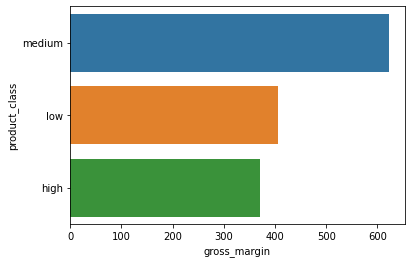

In [ ]:
# Sử dụng seaborn và vẽ ra 5 chart khác nhau (column, line, box,...) với đầy đủ tên chart, tên các trục và chú thích.
# Comment insight/message muốn truyền tải thông qua từng chart
import matplotlib.pyplot as plt
import seaborn as sns
margin_by_product_class = sns.barplot(x='gross_margin', y='product_class', data = df, ci=None)
print(margin_by_product_class)

#category_order=['2017-01','2017-02', '2017-03', '2017-04', '2017-05', '2017-06', '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12']
#tai sao k su dung dc relplot vs order=category_order?

#pivot1 = df.pivot_table(index=['year_month'], values=['gross_margin'], aggfunc='sum').reset_index()
#df_chart1= df[['year_month', 'gross_margin']].groupby(df['year_month'], agg={'gross_margin':'sum'})

#monthly_gross_margin = df.groupby('year_month').agg({'gross_margin':'sum'})
#print(monthly_gross_margin)

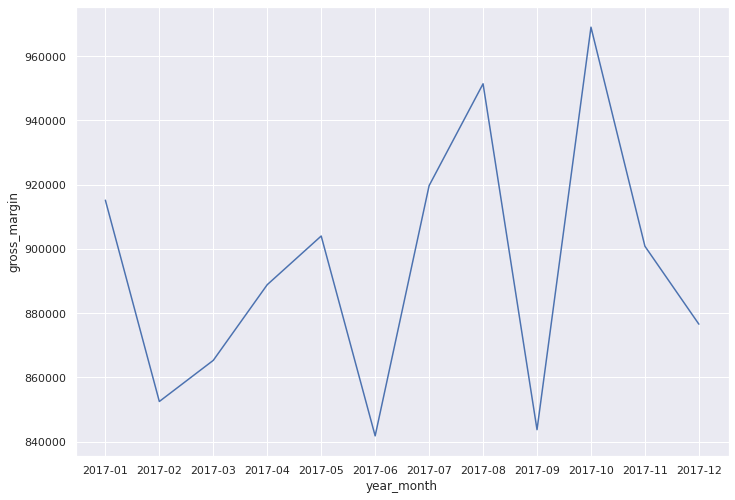

In [ ]:
# pivot1 = df.pivot_table(index=['year_month'], values=['gross_margin'], aggfunc='sum').reset_index()
sns.set(rc={'figure.figsize':(11.7,8.27)})
# df_chart1 = df.groupby(df['year_month'])['gross_margin'].sum().reset_index()
# monthly_revenue = sns.lineplot(x='year_month', y='gross_margin', data = df_chart1, ci=None)

pivot1 = df.pivot_table(index=['year_month'], values=['gross_margin'], aggfunc='sum').reset_index()
monthly_revenue = sns.lineplot(x='year_month', y='gross_margin', data = pivot1, ci=None)


AxesSubplot(0.125,0.125;0.775x0.755)


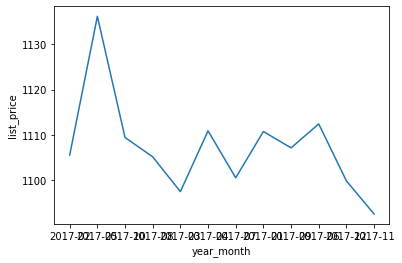

In [ ]:
monthly_revenue = sns.lineplot(x='year_month', y='list_price', data = df, ci=None)
print(monthly_revenue)



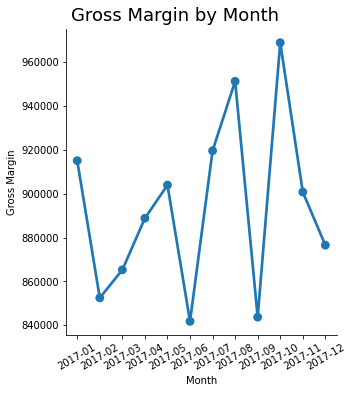

In [ ]:
g=sns.catplot(x="year_month", y="gross_margin", data = monthly_gross_margin, kind="point", order=['2017-01','2017-02', '2017-03', '2017-04', '2017-05', '2017-06', '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12'], ci=None)
g.fig.suptitle("Gross Margin by Month", y=1.03, fontsize=18)
g.set(xlabel="Month", ylabel="Gross Margin")
plt.xticks(rotation=30)
plt.show()


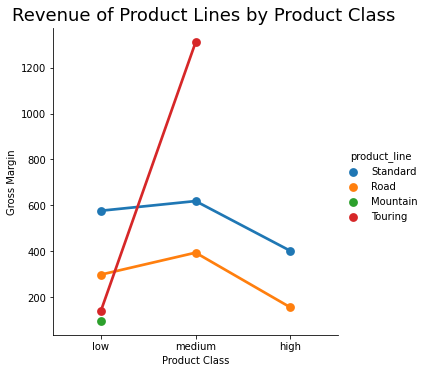

In [ ]:
a=sns.catplot(x='product_class', y='gross_margin', data = df, kind="point", hue="product_line", order=["low","medium","high"], ci=None)
a.fig.suptitle("Revenue of Product Lines by Product Class", y=1.03, fontsize=18)
a.set(xlabel="Product Class", ylabel="Gross Margin")
plt.show()

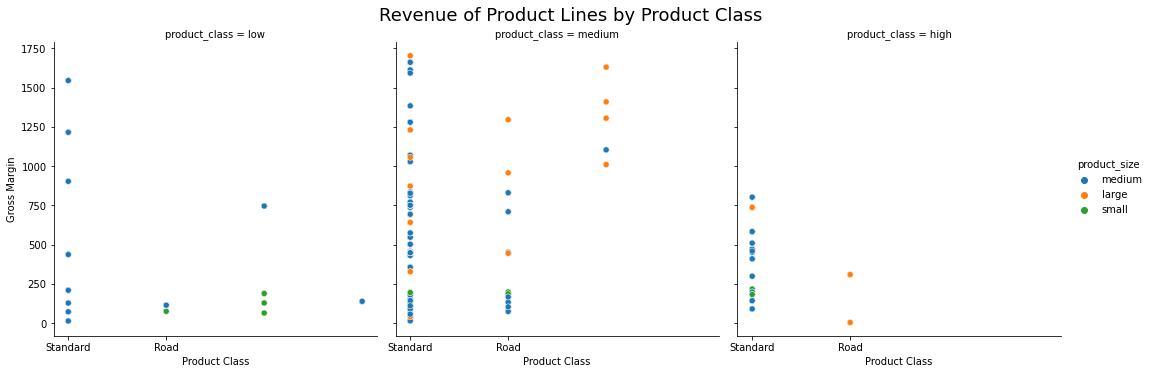

In [ ]:
a=sns.relplot(x='product_line', y='gross_margin', data = df, kind="scatter", hue="product_size", col="product_class", col_order=["low","medium","high"], ci=None)
a.fig.suptitle("Revenue of Product Lines by Product Class", y=1.03, fontsize=18)
a.set(xlabel="Product Class", ylabel="Gross Margin")
plt.show()
